In [ ]:
from pandas_datareader import data
import fix_yahoo_finance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

# 1. Introduction


Welcome to the first unit of the project. You can find the full paper freely available on SSRN at https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3050254 and read it there if you prefer. The full paper though will be reproduced in this and the other project notebooks. We recommend that you read the paper here within the notebook because we will discuss the notebook as we read through it. 

Below is the abstract from "Return Predictability and Market-Timing: A One-Month Model." This will provide a general overview of what the paper's about and some of the main results. Let's start:

<style>
    .warning { color: red; }
</style>

<div class="alert alert-info" role="alert">
<span class="label label-primary"> The Paper </span>

Abstract

We propose a one-month market-timing model constructed from 15 diverse variables. We use
weighted least squares with stepwise variable selection to build a predictive model for the one-month ahead market excess returns. From our statistical model, we transform our forecasts into investable
positions to build a market-timing strategy. From 2003 to 2017, our strategy results in 16.6% annual
returns with a 0.92 Sharpe ratio and a 20.3% maximum drawdown, whereas the S&P 500 has annual
returns of 10%, a 0.46 Sharpe ratio, and a maximum drawdown of 55.2%. When our one-month model
is used in conjunction with Hull and Qiao’s (2017) six-month model, the Sharpe ratio of the combined
strategy exceeds the individual model Sharpe ratios. The combined model has 15% annual returns, a
Sharpe ratio of 1.12, and a maximum drawdown of 14%. We publish forecasts from our one-month
model in our Daily Report. 

<span class="label label-warning"> Assessment Question: Evaluation </span>

Most people will only skim the abstract of a paper and decide if it's relevant to what they want. If so, they may dive in further assuming that the paper is available and not behind a pay-wall. If the cost to access the paper is prohibitive, then the paper abstract is all that a reader might have to go on. That makes the abstract critically important, both as a marketing advertisement to read this paper and as an accurate and useful summary of the paper's results.  

Before we dive into the proverbial sausage factory and try to replicate the above claimed results, what is your impression from the above pitch? Do you think this sounds like a good strategy? Would you personally invest your money in this strategy? Enter your initial thoughts below. We'll come back to this at the end of the project and compare your view then versus now. 


<div class="alert alert-warning" role="alert">
[type your answer here]

Ok, so let's start into the article:

<a id='snap_back_1'></a>
<a id='snap_back_2'></a>
<a id='snap_back_5'></a>
<div class="alert alert-info" role="alert">
<span class="label label-primary"> The Paper </span>

1. Introduction


Return predictability is a central issue in financial economics. Evidence of stock return
predictability is supported by numerous academic research papers. Early work includes
Campbell and Shiller (1988a, 1988b) and Fama and French (1988). More recently, several
papers have presented convincing arguments in favor of predictability (Cochrane, 2005; Rapach,
Strauss, and Zhou, 2010; Bollerslev, Tauchen, and Zhou, 2009; Jiang et al. 2015). Compared to
the large body of work on statistical evidence of return predictability, there is relatively little
work on the portfolio construction of <a href='#supplemental_content_2'> market-timing strategies </a> based on the proposed return predictors, or the economic importance for an investor who has the resources to engage in a market-timing strategy. Understanding the <a href='#supplemental_content_5'>practical economic significance</a> of market timing allows us to view predictability from the investor’s perspective rather than that of the
econometrician. <br><br>

<a href='#supplemental_content_1'> (supplemental content available! ) </a> <br><br>

Hull and Qiao (2017) illustrate the economic importance of return predictability through a
market-timing strategy. They select from a set of 20 well-known return predictors, and combine
these variables using correlation screening. They focus on the six-month future market excess
returns. In the market-timing strategy proposed by Hull and Qiao (2017), the investor can
achieve a Sharpe ratio of 0.85 from 2001 through 2015 by taking tactical positions in the S&P
500, compared to a buy-and-hold Sharpe ratio of 0.21 over the same period. <br><br>

Following the work of Hull and Qiao (2017), we present a novel market-timing strategy. Similar
to Hull and Qiao (2017), we combine a large set of forecasting variables to allow for a diverse
information set, and construct a reliable market-timing model. We consider several variables not
used in Hull and Qiao (2017) including change in inflation, commodity price, housing starts,
exchange rates, FRB Loan Officer Survey, delinquencies, and the change in unemployment rate.
We discuss these variables in more detail in the data section. <br><br>

Unlike Hull and Qiao (2017), we focus on forecasting one-month market excess returns rather
than six-month market excess returns. The focus on shorter-term predictability renders many
classic return predictors (such as price ratios) less useful in favor of variables that capture higher frequency movements in expected returns. Furthermore, several new variables, not included in
Hull and Qiao (2017), capture macroeconomic conditions. Although macroeconomic variables
are typically thought of as slow-moving, we find that combining them results in forming accurate
forecasts of next-month excess market returns, which in turn helps us build a short-term markettiming
model. <br><br>

<a id='snap_back_4'></a>
<a id='snap_back_6'></a>
Our goal in this paper is to build a predictive model for the one-month future market excess
returns and construct a market-timing strategy. We consider 15 return predictors. Some of these
variables have been proposed in the predictability literature, whereas others, in our reading of the
literature, are unique to our paper. We use <a href='#supplemental_content_4'>weighted least squares (WLS) regression</a> with <a href='#supplemental_content_6'>stepwise variable selection</a> to build a forecasting model for next month’s market excess returns. We estimate our forecasting model at the end of every month using an expanding window. Within each month, we hold the model parameters constant and form forecasts using updated
predictor values each day. <br><br>


Armed with our forecasting model, we construct a monthly market-timing strategy by
transforming forecast values into investable positions. The restrictions we place on our
transformation include 1) 0% invested in the S&P 500, and 100% invested in T-bills when the
equity premium forecast is zero, 2) 100% invested in the S&P 500 when the forecast of the
equity premium is equal to its historical average, and 3) maximum of 150% exposure to the S&P
500 when the equity premium forecast is above its historical average. <br><br>

We transform our equity premium forecast into investable positions to satisfy these conditions,
and scale the positions to be inversely proportional to the root-mean-square error (RMSE) of our
statistical model. The inverse of RMSE scaling can be interpreted as our confidence in our
forecasts. If the RMSE of our fitted model is large, we are less confident and want to decrease
our position, whereas if the RMSE is small, we are more confident in our model and increase our
position.<br><br>

From 2003 to 2017, the one-month market-timing model achieves annualized returns of 16.6%
with a Sharpe ratio of 0.92. In the same period, buy-and-hold S&P 500 had 10% annualized
returns and a 0.46 Sharpe ratio. The maximum drawdown of the market-timing strategy is 20%
compared to 55% for buy-and-hold. The one-month strategy works even better when combined with Hull and Qiao’s (2017) six-month model. A portfolio of equal investments in Hull and
Qiao’s (2017) six-month model and our one-month model results in 15% annualized returns with
a Sharpe ratio of 0.92, and a maximum drawdown of only 14%. The improvement in riskadjusted
return for the combined model comes from diversification across models. The onemonth
and six-month models complement each other. Drawdowns for each strategy occur at
different times, and the two strategies underperform buy-and-hold in different years. Combining
the two market-timing strategies forms a more stable and robust portfolio than either stand-alone
strategy. <br><br>

<a id='snap_back_3'></a>

Our paper fits into the literature on return predictability. Many academic studies of return
predictability focus on longer horizons of one or more years (Cochrane, 2008; Welch and Goyal,
2008). A smaller number of articles examine forecasting horizons shorter than one year.
Bollerslev et al. (2009) investigate forecasting using the variance risk premium (VRP) at
different horizons, and document a 1.07% adjusted R2 at the monthly frequency. Moskowitz et al.
(2012) document past 12-month market returns are a positive indicator of next month market
return. <br><br>

<a href='#supplemental_content_3'> (supplemental content available! ) </a> <br><br>

Our paper is similar to Breen et al. (1989) who also try to illustrate the economic importance of
return predictability from the investor’s perspective. Breen et al. (1989) calculates the value of
market-timing to be worth 2% of the total assets under management. The authors construct their
market-timing strategy using the negative relationship between stock returns and the nominal
interest rate. We also put forward a market-timing model, but we consider a significantly larger
set of predictors. We not only focus on the economic significance of market-timing, but also
provide in-depth discussions of the statistical model and the implementation of an investment
strategy. <br><br>

The paper is organized as follows. We list our data sources and describe our statistical model in
Section 2. In Section 3, we explain how to translate statistical results in Section 2 into a market-timing strategy. We proceed with an analysis of model combination in Section 4. Section 5
concludes and suggests potential future research. <br><br>

<span class="label label-warning"> Assessment: Remember </span>

Which of the following are True?

A: Prior researchers have constructed market-timing models of the S&P500 before.

B: A one-month forward prediction of the S&P500 is easier than a six-month forward prediction. 

C: There is little evidence to date that investors can predict stocks returns.

D: Hull et al. calibrate via OLS new model parameters every month. 

E: Hull et al. trade their strategy by allowing one of of only three positions at any given time: 0% invested, 100% invested, or 150% invested. 

<span class="label label-warning"> Assessment: Understand </span>

Let's say you have a model that can predict whether the S&P will go up or down on any given day with 55% accuracy. Give an example of why this may not be economically significant.

[write your answer here]

<span class="label label-warning"> Assessment: Apply </span>

Since The Paper and this project and primarily concerned with building a strategy based on predicting the returns of the S&P 500, we should at least have a knowledge about what the variable looks like. Here we will start writing code to download stock data and do some exploratory analysis. 

### Downloading stock data

Downloading stock data from google or yahoo into python/pandas used to be pretty straightforward via the pandas-datarader library. 

http://pandas-datareader.readthedocs.io/en/latest/

As you can see though from the above link, there have been some complications though which makes finding free data a bit more difficult. There are many resources available for a fee, sometimes a spectacular fee. We will only focus on end-of-day prices rather than higher frequency data which makes our job a bit easier. 

You'll need pandas-datareader and fix-yahoo-finance libraries. 

Note that in the exercise below you'll be asked to calculate the returns to holding the S&P 500. We're going to proxy the S&P 500 by using the ticker "SPY". This is an ETF that tracks the S&P 500. Essentially it's like stock that you can actually buy (whereas the S&P 500 is an index or calculation of weighted-average stock returns... but you can't actually go to you broker and explicitly buy a product called "the S&P 500"). 

Furthermore, we'll be calculating returns as the change in price over some time period. In actuality, this approach underestimates your actual return because it doesn't include dividends. For the S&P 500, the value of returns due to dividends can exceed 10% of the total return in a year. So why don't we use "total returns" instead of just the "price return"? Well, it's mostly a matter of convenience. There aren't a lot of free data sources that will provide total return data. So here's another lesson: a lot of financial data is free... but a lot of accurate and valuable financial data is tremendously expensive. Financial data services like Bloomberg and Factset will have total return data but those cost between `$`12-24 thousand per year. It's worthwhile for professional investors, but not for a student project. 

In [ ]:
#######################################
# SAMPLE
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################

# example of downloading data based on stock ticker
from pandas_datareader import data
import fix_yahoo_finance as yf
yf.pdr_override() 

df = data.get_data_yahoo(['AAPL', 'SPY'], '2018-01-01', '2018-01-31')
df.head()

In [ ]:
#######################################
# CODE EXERCISE
#######################################

def get_stock_data(tickers = ['SPY'],
                  start_date = '2018-01-01', 
                  end_date = '2018-05-31',
                  periodicity = 'monthly'):
    
    '''
    get end-of-day stock price and return information
    
    :param tickers: stock tickers to download, as list of strings
    :param data_source: which data service to use (currently only works with google), as string
    :param start_date: start date of data in "YYYY-MM-DD" format, as string
    :param start_date: end date of data in "YYYY-MM-DD" format, as string
    :param periodicity: get 'daily' or 'monthly' data, as string
    :return: price and volume data for given tickers in stacked format, as dataframe
    '''
    
    # TODO
    

In [ ]:
#######################################
# TEST YOUR CODE IMPLEMENTATION BY RUNNING THIS CELL
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################

df = get_stock_data(tickers = ['SPY', 'AAPL'],
                   start_date = '2018-01-01',
                   end_date = '2018-02-28',
                   periodicity = 'daily')

assert df.shape[0] == 80, 'error: incorrect number of rows'
assert df.shape[1] == 4, 'error: incorrect number of columns'
assert df['ticker'].isin(['SPY', 'AAPL']).sum() == df.shape[0], 'error: unknown ticker'
for c in ['ticker', 'date', 'price', 'return']:
    assert c in df.columns, 'error: missing column {}.format(c)'
    
print('all tests passed!')


In [4]:
#######################################
# EXAMPLE CODE IMPLEMENTATION
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################


yf.pdr_override() 

def get_stock_data(tickers = ['SPY'],
                  start_date = '2018-01-01', 
                  end_date = '2018-05-31',
                  periodicity = 'monthly'):
    
    '''
    get end-of-day stock price and return information
    
    :param tickers: stock tickers to download, as list of strings
    :param data_source: which data service to use (currently only works with google), as string
    :param start_date: start date of data in "YYYY-MM-DD" format, as string
    :param start_date: end date of data in "YYYY-MM-DD" format, as string
    :return: price and volume data for given tickers in stacked format, as dataframe
    '''
    
    assert isinstance(tickers, list), 'error: tickers must be a list'
    assert isinstance(start_date, str), 'error: start_date must be a string'
    assert isinstance(end_date, str), 'error: end_date must be a string'
    assert periodicity in ['daily', 'monthly'], 'error: invalid periodicity'
    
    # download data
    df = data.get_data_yahoo(tickers, start_date, end_date)
    
    # if monthly periodicity, only keep month-end dates
    if periodicity == 'monthly':
        df.reset_index(inplace = True, drop = False)
        df['month'] = df['Date'].dt.month
        mask = df['month'] != df['month'].shift(-1)
        df = df[mask]
        del df['month']
        df.set_index('Date', inplace = True)
    
    if len(tickers) == 1:
        # if only one ticker, then ticker name is not in the dataframe
        # add it
        df['ticker'] = tickers[0]
        
    else:
        # if multiple tickers, then the data uses multiindex colum format
        # stack data to get the data for ticker1, then the data for ticker2 underneath it, etc
        df = df.stack()
    
    # rename columns
    df.reset_index(inplace = True, drop = False)
    df.rename(columns = {'Date': 'date', 
                         'level_1': 'ticker',
                         'Close': 'price'}, inplace = True)
    df.sort_values(by = ['ticker', 'date'], inplace = True)
    
    # calculate daily return by ticker
    df['return'] =  df.groupby(by = 'ticker')['price'].apply(lambda x: x / x.shift(1) - 1.0)
    
    return df[['ticker', 'date', 'price', 'return']]
    
df = get_stock_data(tickers = ['SPY', 'AAPL'], start_date = '1990-01-01', periodicity = 'monthly')
print(df.head())
print(df.tail())

[*********************100%***********************]  2 of 2 downloaded
  ticker       date     price    return
0   AAPL 1990-01-31  1.214286       NaN
1   AAPL 1990-02-28  1.214286  0.000000
2   AAPL 1990-03-30  1.437500  0.183823
3   AAPL 1990-04-30  1.406250 -0.021739
4   AAPL 1990-05-31  1.473214  0.047619
    ticker       date       price    return
637    SPY 2018-01-31  281.899994  0.056359
639    SPY 2018-02-28  271.649994 -0.036360
641    SPY 2018-03-29  263.149994 -0.031290
643    SPY 2018-04-30  264.510010  0.005168
645    SPY 2018-05-31  270.940002  0.024309


<span class="label label-warning"> Assessment: Analyze </span>

Let's do some exploratory analysis now. If we're trying to predict the monthly returns of the SP500 as part of a trading strategy, then we should know what those returns look like. What's the mean? Are the returns bell-shaped? What are the maximum and minimum monthly returns?

<b>Examine</b> the S&P 500 data using the SPY ticker, which is an ETF that tracks the index. At a minimum, plot the price and returns over time and plot a histogram that shows you the distribution of returns. If you want to be an "expert" on the S&P 500, what other charts would you like to see?

In [ ]:
#######################################
# CODE EXERCISE
#######################################

#TODO



count    304.000000
mean       0.006844
std        0.040830
min       -0.165187
25%       -0.017487
50%        0.011521
75%        0.033657
max        0.109147
Name: return, dtype: float64


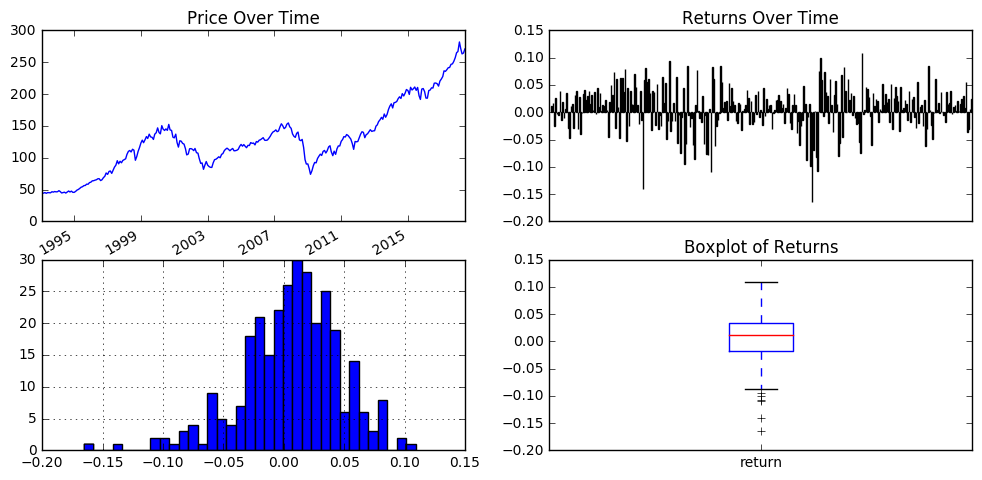

In [6]:
#######################################
# EXAMPLE CODE IMPLEMENTATION
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################


def visualize_data(df):
    
    # plot multiple charts in a 2x2 grid
    f, axes = plt.subplots(2,2, figsize = (12,6))
    
    # plot 1: line plot of price over time
    df.set_index('date')['price'].plot(title = 'Price Over Time', ax = axes[0][0])
    
    # plot 2: bar chart of returns over time, with x-axis labels hidden (it's messy)
    # https://stackoverflow.com/questions/40705614/hide-axis-label-only-not-entire-axis-in-pandas-plot
    df.set_index('date')['return'].plot(kind = 'bar', title = 'Returns Over Time', ax = axes[0,1])
    ax1 = axes[0,1]
    x_axis = ax1.axes.get_xaxis()
    x_axis.set_visible(False)

    # plot 3: return histogram with a red line at the mean return
    df['return'].hist(bins = 35, ax = axes[1,0])
    
    # plot 4: boxplot
    df['return'].plot.box(ax = axes[1,1], title = 'Boxplot of Returns')

    print(df['return'].describe())   
    return None
              
visualize_data(df[df['ticker'] == 'SPY'])

<span class="label label-warning"> Assessment: Evaluate </span>

In this project we are going to be constructing a strategy based on buying the S&P 500 at opportune moments in time and not investing in it otherwise. How do we know if the strategy is any good? Is it because we make more money than if we just buy and hold the S&P 500? Because we make more money than not investing at all (ie not losing money)? Or is it because the Sharpe ratio of the strategy is good?

There are many ways of evaluating the performance of a strategy. You covered many of them in ML4T. Here's another way of doing it: your strategy should outperform a random strategy. 

In computer science we are used to randomness. It underlies a lot of what we do. For instance, in the Machine Learning course we learned about random optimization strategies. Let's use it here for evaluating an investment portfolio. 

I'll be upfront that using a random portfolio is not standard operating procedure across the industry. But I saw it at a conference and thought it was a pretty good idea. And a google search revealed that other people us it too. It's up to you to decide if it makes sense to you. 

Let's imagine someone comes up with a simple strategy for investing in the S&P 500. At the start of each month, she flips a coin. If it's heads, she buys the S&P 500 and holds it for the month. If it's tails, she does nothing. She does this starting with the monthly return in January 2000 and the last monthly return she considers is from December 2015. 

We can simulate this strategy. Spoiler alert, some of the time this random strategy will beat the S&P 500. Sometimes it will win big! Other times it will lose. Here's some easy intuition about whether our strategy is any good: If we have a trading strategy that beats only 5% of random portfolios, it's probably not a very good strategy. But if we have a trading strategy that beats 95% of random portfolios, then there's a chance it's good and we should investigate further.

"The key lesson is that using a set of random portfolios to evaluate a given strategy is a powerful tool. By comparison, the standard approach—comparing a portfolio to one idealized benchmark or a peer group in the same strategy neighborhood—is inferior as a methodology for analysis. Why? Because cherry picking a handful of funds for a benchmark isn’t representative of what could happen. If we’re testing a portfolio strategy, it’s essential to review all the possible outcomes, even if those outcomes never occurred in the real world."

https://www.capitalspectator.com/using-random-portfolios-to-test-asset-allocation-strategies/

Other resources into this idea

https://www.forbes.com/sites/alexknapp/2013/03/22/computer-simulation-suggests-that-the-best-investment-strategy-is-a-random-one/#22587fd95136

http://www.portfolioprobe.com/about/random-portfolios-in-finance/

https://www.cnbc.com/2014/07/25/random-stock-picking-will-beat-sp-fund-manager.html

Simulate the above strategy. So you should be randomly invested each month in the S&P 500 with a weight of either 100% or 0%. Simulate this strategy 1,000 times and plot the returns of the random portfolios over time. What is the mean and median return? Did it beat the S&P 500 over this period? What percentage of the random portfolios beat the S&P 500? 

In [ ]:
#######################################
# CODE EXERCISE
#######################################

#TODO


[*********************100%***********************]  1 of 1 downloaded
...working on random portfolio 99

the mean return of the random portfolios is: 0.18927508886862343
the median return of the random portfolios is: 0.12968481943132915
the max return of the random portfolios is: 1.8766212059970018
the min return of the random portfolios is: -0.5457324325181486
the return of SPY over the same period was: 0.38805102978723394
25.0% of the random portfolios beat the S&P 500

all done in 1.5879995822906494s


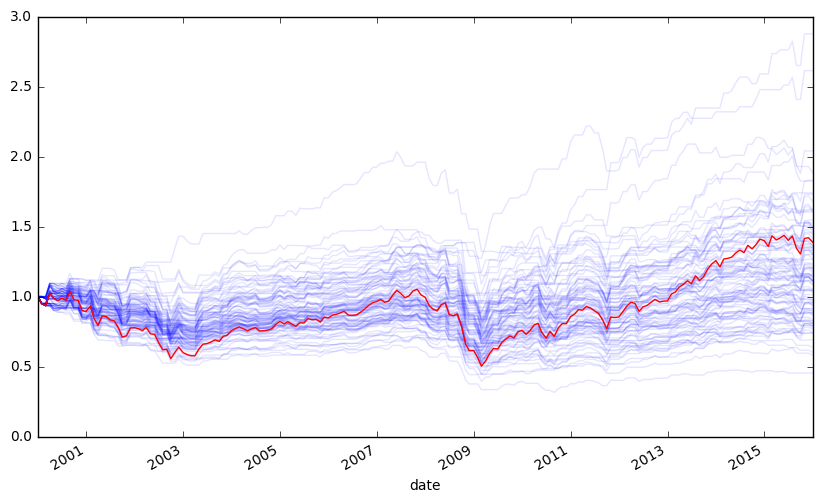

In [48]:
#######################################
# EXAMPLE CODE IMPLEMENTATION
# DO NOT MAKE ANY CHANGES IN THIS CELL
#######################################

# get monthly SPY data
spy_data = get_stock_data(tickers = ['SPY'], 
                    start_date = '1999-12-25', 
                    end_date = '2015-12-31',
                    periodicity = 'monthly')

# construct a random portfolio
def random_portfolio_generator(df):
    
    # create a random number (between 0 and 1) each month
    df['random'] = np.random.rand(df.shape[0])
    
    # invest in SPY 50% of the time (if the random number for the month is greater than 0.5)
    # set weight to either 0 or 1
    df['weight'] = df['random'].map(lambda x: 1.0 if x >= 0.5 else 0.0)
    
    # calculate the strategy return each month
    df['portfolio_return'] = df['return'] * df['weight']
    
    # calculate the cumulative strategy returns over time
    # (cumulative product of returns)
    df['portfolio_return'] += 1.0
    df['portfolio_return'].fillna(1.0, inplace = True)
    df['cum_portfolio_return'] = df['portfolio_return'].cumprod()
    return df[['date', 'cum_portfolio_return']]

# now plot a bunch of random portfolios on a single chart
f, axes = plt.subplots(1,1, figsize = (10,6))
counter = 0
start = time.time()
cumulative_returns = []
for i in range(100):
    counter += 1
    if counter % 100 == 0:
        print('...working on random portfolio {}'.format(i))
    res = random_portfolio_generator(spy_data)
    cumulative_returns.append(res['cum_portfolio_return'].iloc[-1])
    res.set_index('date')['cum_portfolio_return'].plot(ax = axes, alpha = 0.1, color = 'blue')
    
# overlay the actual S&P 500 return onto the random portfolio plot
temp = spy_data.copy()
initial_value = temp['price'].iloc[0]
temp['cum_spy_return'] = (temp['price'] / initial_value ) * 1
temp.set_index('date')['cum_spy_return'].plot(ax = axes, alpha = 1.0, color = 'red')

# print statistics
print()
print('the mean return of the random portfolios is: {}'.format(np.mean(cumulative_returns) - 1.0))
print('the median return of the random portfolios is: {}'.format(np.median(cumulative_returns) - 1.0))
print('the max return of the random portfolios is: {}'.format(np.max(cumulative_returns) - 1.0))
print('the min return of the random portfolios is: {}'.format(np.min(cumulative_returns) - 1.0))
print('the return of SPY over the same period was: {}'.format(temp['cum_spy_return'].iloc[-1] - 1.0))
temp = np.array(cumulative_returns)
pct_beat = ((temp - 1.0) > 0.38805102978723394).mean()
print('{:.3}% of the random portfolios beat the S&P 500'.format(pct_beat * 100))
print()

print('all done in {}s'.format(time.time() - start))

<span class="label label-warning"> Assessment: Create </span>

You've read the intro to The Paper which has an outline of the whole research effort. Remember in school when the teacher recommended to write an outline of your paper before writing the paper? Let's do something similar here. Write an outline of what you need to do to recreate this paper. 

Now compare that outline against any modifications you want to make to the methodology. For instance, alternative ways to form and test a market-timing model of the S&P 500, incorporating any deviations to the methodology you think are interesting and worthwhile. Maybe you think using a one-month forward prediction model isn't ideal? Maybe you want to use a 3-month model?


In [ ]:
#TODO

### End Lesson

That's it for the introduction section. You can proceed to the next workbook

[intentionally left blank]
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>
<br><br>



<span class="label label-success"> Commentary and Supplemental Content </span>
<a id='supplemental_content_1'></a>


## Can you predict the stock market? Smart People Say Yes... and Other Smart People Say No

<i>"Evidence of stock return predictability is supported by numerous academic research papers."</i> (Hull, Qiao, Bakosova, 2017)

<i> "Most academic studies have supported the validity of some version of the EMH" </i> (Romero, Balch, 2014)

This is possibly a controversial statement! Obviously money managers and people who want to charge you a fee will tell you that stock's are predictable, and that specifically, they can do the predicting for you. But there is a long history pitting those that think stocks are predictiable versus those that do not. 

On the one side is the Efficient Market Hypothesis (EMH) which began to form in the 1960s. At its core, the EMH is a theory that asset (stock) prices reflect all available information. Let's use an example: Let's say Apple's stock price is `$`100 at the end-of-the-day Monday. On Tuesday at 10am it is reported on CNBC that Apple lost the keys to their factory and cannot produce any more iPhones for the next month. The news is information and that information should therefore be incorporated into the price of Apple stock. Presumably the stock price will fall. Perhaps to `$`90, perhaps to `$`80, perhaps the stock even goes up to `$`110. We don't know and that's not really the point. The point is that the price reflects that information. A violation of EMH would be that the news comes out, people think it's bad for Apple but then no one buys or sells the stock because of that information and nothing happens to the stock price. 

As stated above, the EMH is pretty simple but there are nuances that you can quibble over and quite a few profound consequences flow from EMH. In terms of nuance:
 * What constitutes "available information"? If something is on CNBC then everyone will know about it. But what if only 20 investors know about Apple's missing key debacle? What if only Apple employees know about it and they're prohibited by law from trading on that non-public information?
 * How quickly do prices reflect the information? Instantaneously? Over the course of the day?

Furthermore, there are three broad potential conclusions you could form if you believe in the idea that stock prices reflect all available information. All revolve around the idea that markets are competitive and that it is therefore hard to earn more profit than what is offered by just investing in the market itself. This means that while a lot of people will beat the market over short periods of time (say over the past one year), hardly anyone (perhaps even no one) will beat the market over very long periods (20 years? 30 years?). As stated by financial research firm Morningstar, the three main EMH versions are:  

 * The <b>weak form of EMH</b> assumes that current stock prices fully reflect all currently available security market information. It contends that past price and volume data have no relationship with the future direction of security prices. It concludes that <i>excess returns cannot be achieved using technical analysis</i>.
 * The <b>semi-strong form of EMH</b> assumes that current stock prices adjust rapidly to the release of all new public information. It contends that security prices have factored in available market and non-market public information. It concludes that <i>excess returns cannot be achieved using fundamental analysis</i>.
 * The <b>strong form of EMH</b> assumes that current stock prices fully reflect all public and private information. It contends that market, non-market and inside information is all factored into security prices and that no one has monopolistic access to relevant information. It assumes a perfect market and concludes that <i>excess returns are impossible to achieve consistently</i>.

http://www.morningstar.com/InvGlossary/efficient_market_hypothesis_definition_what_is.aspx

TLDR: Simply put, all three versions say, to varying degrees, that it's hard to beat the market. 

The impact of the EMH is hard to overstate. It's common today to hear about "passive investing" where you don't try to pick individual stocks but rather buy an ETF or mutual fund based on a broad stock index and then hold it for long period. Those are all consequences of the EMH. In the popular press, Burton Malkiel of Princeton University wrote the 1973 bestseller <i> A Random Walk Down Wall Street: The Time-Tested Strategy for Successful Investing </i> (It's good. You should read it if you have a few hours) and said "a blindfolded monkey throwing darts ar the stock listings could select a portfolio that would do just as well as one selected by experts." 

(Related: Burton Malkiel's "The Efficient Market Hypothesis and Its Critics".
https://www.princeton.edu/ceps/workingpapers/91malkiel.pdf)

The takeaway is that you shouldn't try to beat the market by picking what you think will be winning stocks (you'll probably end up far behind the market if you do) and instead just invest "passively" in the broad market itself by buying a fund that contains all stocks. A few years after publishing the first edition of A Random Walk Down Wall Street he went on to start some of the first passive index mutual funds at Vanguard, an asset manager that has grown to manage over `$`5 trillion by 2018. 

On a personal note, there's a good change you have ETFs or mutual funds that track the S&P500 or something similar in your retirement or savings account. The EMH is the reason why.  

But on the other side of the argument are other smart academics and some very rich investors who think that you can predict stock returns and beat the market. The typical retort to proponents of EMH advocates is that Warren Buffet's record of investing shows that you can beat the market over very long periods (and the retort to this retort is that if enough people flip a coin repeatedly then by random chance someone will flip heads 100 times in a row... that doesn't mean they have amazing coin flipping abilities). 

Aside from anecdotes about Warren Buffet and other investors that are known to have very impressive track records, Hull et al. also reference a list of academics that have found evidence against the EMH and who have constructed new theories, backed by evidence, math, and intuition, that try to explain predictable returns and the ability to beat the market. Eugene Fama, who's bio on the University of Chicago's business school website calls the "father of modern finance" is also the originator of the EMH. At the risk of oversimplifying his work and its many nuances, Fama, along with Kenneth French undercut some of the EMH by acknowledging and incorporating into a new model the fact that certain stocks have historically (and predictably) done better than the market. For instance, value stocks (stocks where the underlying company value is high relative to the market capitalization of the firm) and stocks of small companies, on average, tend to do better. 

But why should certain stocks predictably earn better returns? Is this just random? John Cochrane, another academic, explains in his online PhD lectures that certain stocks might earn <i>less</i> return (a return discount) because they don't need to. His explanation is far more elegant in math but here's the intuition: 

Investors will buy certain stocks even though they will return less because they are less risky. For example whereas technology stocks like Amazon and Apple will return a lot, they are heavily dependent upon the health of the broader economy. But a ho-hum stock from your power or water company will be comparatively stable. People may like the turbo-charged returns of Amazon but if the economy tanks, investors lose their jobs and their stock portfolio full of Amazon stock also shrinks dramatically, then they have just endured hits to both their income and their savings. But the stock of the power company tends to be more stable, during both economic expansions and contractions. The investor loses her job but is buoyed by stable income generated by her stock in the power company. Assuming that investors are risk averse, and that they prefer stable sources of income over a feast-to-famine lifestyle, they will want to hold the stock of the power company, they will bid up the price of the power company and therefore predictably reduce the returns of the power company. 

Alternatively, other academics have explained that some stocks predictably do better than the market because of investor psychology (aka the school of behavioral finance or behavioral economics). People <i>overreact</i> to bad news and therefore you can systematically buy when other people are selling. Alternatively, people <i>underreact</i> to long periods of good news and therefore you should buy things that consistently are doing well. Or, people like stocks with tickers that are easy to pronounce and remember like "GOOGL" versus unattractive tickers like "RDO". Believe it or not, that last one is an actual study (and inspired several derivative studies). 

The Paper and this project fit into the larger debate about the EMH and whether you can reliably beat the market. Should you invest in an S&P500 index fund and pay a cheap 0.10`%` per year in fees? Or should you invest in someone who promises they'll make you more money and charge you 1`%` per year? Hopefully you'll have a better opinion on that question at the end. 


<a href='#snap_back_1'> go back to main body </a>

<span class="label label-success"> Definition </span>
<a id='supplemental_content_2'></a>

### Clarification on what is a "Market-timing Model"

A market-timing strategy is based on knowing when to buy or sell a stock. The idea is that you only want to hold the stock when it's going up. And you want to sell it before it goes down. This is in contrast to a stock-selection strategy which is about knowing which particular stock to buy at a given point in time. For example:

 * stock-selection: should I buy Apple or should I buy IBM?
 * market-timing: Should I buy Apple right now because I think that it's going to go up starting tomorrow and through the next week? If not now, when should I buy it? And after I bought it, when should I sell it (when do I think it'll start going down)?
 
The two strategies are not totally exclusive of each other and you can imagine any decision-making process considers both. 

<a href='#snap_back_2'> go back to main body </a>

<span class="label label-success"> Commentary and Supplemental Content </span>
<a id='supplemental_content_3'></a>

### The Prediction Time Horizon Matters

In trying to predict returns you have to define what time horizon you're using to calculate the return. This is not a benign decision. 

Some investors, like Warren Buffet, look at returns over multi-year periods. They don't care about what a stock is going to do over the next few months, or even the next few years. Other traders will buy a stock and only expect to hold it for fractions of a second before selling it for a tiny expected profit. In the middle ground, there any many professional investors who are trying to beat the market over the period of months because every calendar quarter they have to report their portfolio performance to investors and so there's a quarterly risk of getting fired for poor results. 

The time horizon you select will determine the mode of analysis you use. If you intend to hold a stock for a millionth of a second, you probably aren't using low frequency data like company fundamentals, which are only updated every three months. Alternatively, if you want to hold a stock for 10 years, then the fickle ups and downs of twitter sentiment might not be the best guiding light into the company (or maybe it is! You should test this, find a brilliant use of tweets for playing the stock market, and retire early). 

In a prior paper, Hull et al. previously used a 6-month horizon. In this paper, they're shortening it to a one-month window. They mentioned that because of that difference, they're using different variables for their model but they don't give much explanation why they shortened the horizon in the first place. It's easy to imagine that the time horizon they chose could be an important hidden parameter in their analysis and that predicting one-month returns is much easier than predicting six-month returns. Or maybe three-months is the sweet spot? Just something to think about for when you decide how you want to replicate the experiment...

<a href='#snap_back_3'> go back to main body </a>

<span class="label label-success"> Commentary and Supplemental Content </span>
<a id='supplemental_content_4'></a>

### Weighted-Least Squares Regression

We'll cover weighted-least squares (WLS) regression from a technical perspective later. For now, we can offer a simple definiton. In ordinary-least squares (OLS), we construct a model using a series of training observations. Each training observation has an equal weight. In WLS, we think of certain training observations as being more important than others. 

For example, say you are analyzing countries and trying to run a regression where you predict country GDP per capita and you use the explanatory variables of median years of education, capital stock, size of the banking system, etc. You have 100 data points from 100 different countries. For whatever reason you really want to have a model that accurately describes Western countries. Because of this you might want to give higher weights to the USA, UK, France, Canada, etc and less weight to Angola, Sri Lanka, Japan. etc. If you were using OLS, the USA would a 1/100 weight. But using WLS you might arbitrarily decide that the USA should have twice that weight and count for 2/100. 

In the above example we weighted observations based on geography. Later we will see that Hull et al. construct their weights based on time. More recent observations (say from the year 2017) are more important than observations from far back (1990). 

<a href='#snap_back_4'> go back to main body </a>

<span class="label label-success"> Commentary and Supplemental Content </span>
<a id='supplemental_content_5'></a>

### What Do We Mean by "Economic Significance"

Often times we discuss statistical significance and analyze whether a result was merely do to chance. In economic significance we try to assess whether something has a meaningfully large impact. For example, in this made up example we might find that a teacher having a masters degree improves student graduation rates and the effect is statistically significant. However this may not be economically significant if it means that it only increases the graduation rate by 0.00001%. In this scenario, all the time and cost to finding or educating teachers at the masters level is not worth the gain in student outcomes. 

Other resources:

https://tien89.wordpress.com/2010/03/05/statistically-vs-economically-significant/

https://analystprep.com/cfa-level-1-exam/quantitative-methods/statistical-vs-economic-significance/


<a href='#snap_back_5'> go back to main body </a>

<span class="label label-success"> Commentary and Supplemental Content </span>
<a id='#supplemental_content_6'></a>
    
### How to Choose Which Variables Go Into a Model

We well implement "stepwise variable selection" in later sections. For now, we can describe it as an iterative process (which should make sense to you as a computer scientist!). Let's say you have 10 variables you can possibly put into a linear regression model. You start by only including var1 and record how good of a model it is (say by using the RMSE or R^2). Then you try var2, then var, etc. After trying them all, you pick the variable that had the best performance and you add that to your model. 

Then you iterate through the remaining nine variables and find which one, in combination with the variable you added in the previous round, produces the best model. Keep going until you hit some stopping criteria that you define (eg the performance only increases by an arbitrarily small amount).

You can do forward variable selection whereby you start with zero variables and add variables one at a time. Or backwards variable selection whereby you start with all variables and subtract variables one at a time. 

There are other methods for variable selection. If you've taken Data and Visualize Analytics you might recall "regularization" or if you've taken a statistics course you might be familiar with statistical significance tests. Stepwise selection procedures are alternatives to these approaches. Maybe you think one would be better suited for your experiment than the others?
    
<a href='#snap_back_6'> go back to main body </a>